In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from functools import reduce
import scipy
from scipy import sparse
import scipy.sparse.linalg

 Exercise 0.1: Plotting
 In this exercise, you will get familiar with numpy.array and the matplotlib package.
 Plotting the function f(x) = x2 for x ∈ [−1,1].
 a) Create a numpy array X of evenly distributed points in [−1,1]. For example,
 X =[−1.,−0.9,−0.8,...,1.]
 b) Create a numpy array Y of f(xi) with point xi from the array X we created.
 c) Plot the function. Hint: matplotlib.pyplot.plot
 Now, we repeat the same procedure but considering f(x) = e−x for x ∈ [0,10].
 d) Repeat step (a)-(c)
 e) Plot now the Y in log scale. Hint: matplotlib.pyplot.semilogy
 Suppose in additional to the data Y , we also have the standard deviation ∆Y to the data
 resulting from some random error,
 f) Create a numpyarray∆Y andputinsomesmallrandomnumbers. Hint: numpy.random.rand
 g) Repeat the steps before, but plot the errorbar ∆Y with the data Y.
 Hint: matplotlib.pyplot.errorbar

In [3]:
x = np.linspace(-1.0,1.0,21)
y = x**2
a=np.linspace(0,10,50)
fun2 = np.exp(-a)
b = np.log(fun2)

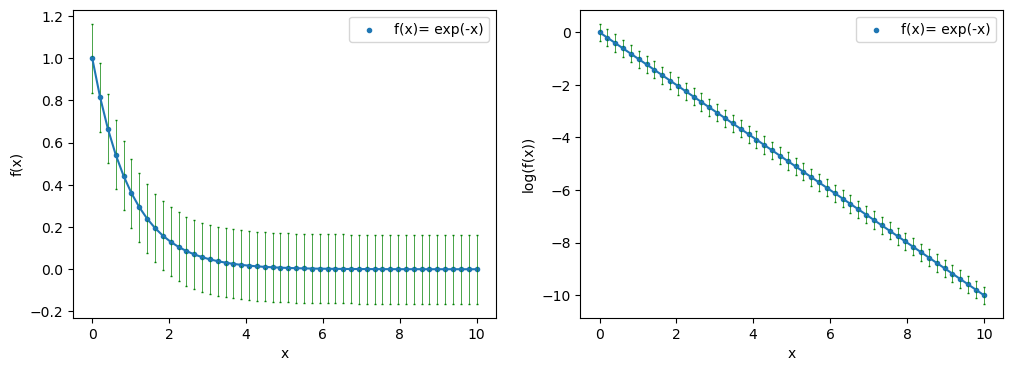

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (12,4), sharex=True)
axes[0].scatter(a,np.exp(-a), label = "f(x)= exp(-x)", marker = '.')
axes[0].errorbar(a,np.exp(-a), yerr= 0.5*np.std(y), capsize=1,ecolor= 'green',elinewidth= 0.5, )
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].legend()



axes[1].scatter(a,b, label = "f(x)= exp(-x)", marker = '.')
axes[1].errorbar(a,b, yerr= np.std(y), capsize=1,ecolor= 'green',elinewidth= 0.5, )
axes[1].set_xlabel("x")
axes[1].set_ylabel("log(f(x))")
axes[1].legend()

plt.show()

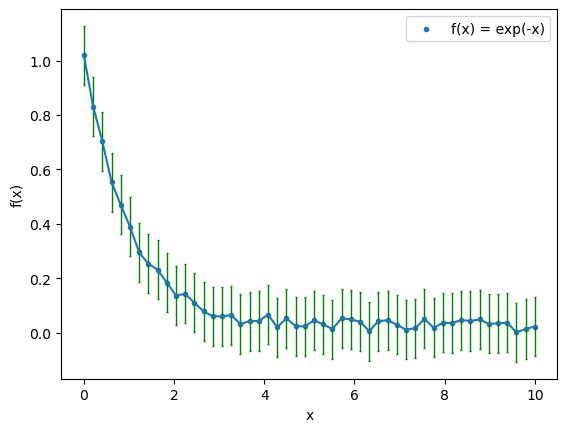

In [5]:
fun2er= fun2 + 0.05*np.random.rand(len(fun2))

plt.figure()
plt.scatter(a, fun2er, label="f(x) = exp(-x)", marker= '.')
plt.errorbar(a,fun2er, yerr= 0.5*np.std(fun2er), capsize=1,ecolor= 'green',elinewidth= 1, )
plt.xlabel("x")

plt.ylabel("f(x)")
plt.legend()
plt.show()


 Exercise 0.2: Numerical linear algebra methods
 
 In this exercise, you will get familiar with numpy.array and numpy.linalg package.
 Consider the Heisenberg model of two spins,
 $$
 H = 
 σα
 1σα
 2 = σx
 1 ⊗ σx
 2 + σy
 1 ⊗ σy
 2 + σz
 1 ⊗ σz
 2 ,
 α=x,y,z
 $$
 
 where the Pauli matrices are given as
 $$
 σx = 0 1
 1 0 , σy= 0 −i
 i
 0 , σz= 1 0
 0 −1 
 $$

 a) Construct the Pauli matrices as numpy arrays.
 
 b) Construct the Hamiltonian of the Heisenberg model as a numpy array.
 
 c) Diagonalize the Hamiltonian. What are the eigenvalues and eigenstates?
 Hint: numpy.linalg.eigh
 
 d) Construct the operator for the total magnetization in z direction
 $
 M =σz
 1 ⊗12+11⊗σz
 2,
 $
 
 and compute its expectation value and variance ⟨M2⟩ − ⟨M⟩2 for for the ground
 state of H as well as the state
 $
 1
  √
 2
 (|↑↑⟩ + |↓↓⟩).
 $
 
 e) Optional: How would you generalize your code from part b)-d) to more than two
 spins with the same nearest-neighbor Heisenberg interaction?
 

In [6]:
sigx = np.array([[0.,1.],[1.,0.]])
sigy =np.array([[0.,-1.j],[1.j,0.]])
sigz = np.array([[1.,0.],[0.,-1.]])

In [7]:
H = np.kron(sigx, sigx)+np.kron(sigy, sigy)+ np.kron(sigz,sigz)
eiv = np.linalg.eigh(H)
Hd = np.diag(eiv[0])
Ph = eiv[1]
M = np.kron(sigz,np.eye(2))+ np.kron(np.eye(2), sigz)
sp.Matrix(H)


Matrix([
[1.0,    0,    0,   0],
[  0, -1.0,  2.0,   0],
[  0,  2.0, -1.0,   0],
[  0,    0,    0, 1.0]])

-
state and expectation for magnetization 


In [8]:
sp.Matrix(M)

Matrix([
[2.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0, -2.0]])

In [9]:
b0 = np.mat([1,0])
b1 = np.mat([0,1])
psi0 = (np.kron(b0,b0) + np.kron(b1,b1) )/np.sqrt(2)
rho0 = np.outer(psi0, np.conj(psi0).T)
Mexp= np.trace(np.matmul(M,rho0))
M2 = np.matmul(M.conj().T,M )
M2exp= np.trace(np.matmul(M2,rho0))
print('expectation value of M',Mexp,'expectation value of M^2',M2exp)

expectation value of M 0.0 expectation value of M^2 3.999999999999999


e) Optional: How would you generalize your code from part b)-d) to more than two spins with the same nearest-neighbor Heisenberg interaction?


## hamiltonian


In [3]:
L= int(input('number of spins in the chain'))

number of spins in the chain 2


In [12]:
import numpy as np
import scipy
from scipy import sparse
import scipy.sparse.linalg as linal

import matplotlib.pyplot as plt
import sympy as sp

Id = sparse.csr_matrix(np.eye(2))
Sx = sparse.csr_matrix([[0., 1.], [1., 0.]])
Sz = sparse.csr_matrix([[1., 0.], [0.,-1.]])
sy = sparse.csr_matrix([[0.,-1.j],[1.j,0.]])
Splus = sparse.csr_matrix([[0., 1.], [0., 0.]])
Sminus = sparse.csr_matrix([[0., 0.], [1., 0.]])

def Hsig_to_full(op, i, L):
    op_list = [Id]*L # = [Id, Id, Id ...] with L entries
    op_list[i] = op
    op_list[(i+1)%L] =op
    full = op_list[0]
    # final_op = []
    for op_i in op_list[1:]:
        full = sparse.kron(full, op_i, format="csr")
     #   final_op.append(full)
    return full

def gen_ham(L):
    H= sparse.csr_matrix((2**L,2**L))
    for j in range(L):
        H+=-t*(Hsig_to_full(Sx,j,L))-0.1*(singesite_to_full(Sz,j,L))

    return H


In [13]:
t=1
testham = gen_ham(L)#* (1/L)
#sp.Matrix(testham.toarray())

In [14]:
testham.toarray()

array([[-0.2,  0. ,  0. , -2. ],
       [ 0. ,  0. , -2. ,  0. ],
       [ 0. , -2. ,  0. ,  0. ],
       [-2. ,  0. ,  0. ,  0.2]])

In [14]:
#h_np = testham.toarray()
#eiv , eis = np.linalg.eigh(h_np)
eiv,eis = sparse.linalg.eigsh(testham,k = 6,tol= 0.001, maxiter= 1e6)

#eiv_new = eiv.copy()
#eiv_new[np.isclose(eiv_new, 0.0)] = 0.0
eiv[np.isclose(eiv, 0.0)] = 0.0
#sp.Matrix(eiv)

eiv

array([-28.56918544, -27.48842671, -26.78618971, -26.09362823,
       -25.1946109 , -24.48925792])

In [54]:
mat_sparse = sparse.csr_matrix([[1, 0, 0], [0, 5, 0], [0, 0, 9]])


np.savetxt('ham_14len.txt', mat_sparse.toarray(), fmt='%.12f')

In [16]:
degen =np.where(eiv == np.min(eiv))
degen

(array([0]),)

In [17]:
digits =8
eis = np.round(eis, decimals=digits)

#sp.Matrix(eis)
np.savetxt('eis_14len.txt', eis, fmt='%.12f')

In [18]:
((eis.T)[0]).nonzero()

(array([  383,   447,   479, ..., 65056, 65088, 65152]),)

In [44]:
(eis.T)[0]

array([ 0.        -0.j        , -0.12233721-0.09334366j,
        0.08327797+0.29485397j,  0.57736031-0.19820446j,
        0.03905924-0.20151031j, -0.36162704+0.46702006j,
       -0.21573326-0.2688156j ,  0.        -0.j        ])

In [45]:
eis_new = (eis.copy())
eis_new[np.isclose(eis_new,0.0)] = 0.0

sp.Matrix(eis_new)


Matrix([
[                         0,   -0.456714 + 0.48346016*I,                          0, -0.22010445 + 0.51318779*I,                          0, -0.54734155 + 0.14087985*I],
[-0.12233721 - 0.09334366*I, -0.06465387 - 0.29849483*I,  -0.0320085 + 0.17412637*I,  0.18917582 + 0.36383983*I,  -0.05117337 + 0.6959738*I,   0.06874219 + 0.1346887*I],
[ 0.08327797 + 0.29485397*I, -0.06465387 - 0.29849483*I,  -0.05970415 - 0.4246354*I,  0.18917582 + 0.36383983*I,  0.18528657 - 0.19234665*I,   0.06874219 + 0.1346887*I],
[ 0.57736031 - 0.19820446*I, -0.17406821 - 0.18945623*I, -0.22074443 + 0.10602512*I, -0.01825825 - 0.18676272*I,  0.14714585 + 0.29008444*I, -0.13417817 + 0.33010373*I],
[ 0.03905924 - 0.20151031*I, -0.06465387 - 0.29849483*I,  0.09171265 + 0.25050903*I,  0.18917582 + 0.36383983*I,  -0.1341132 - 0.50362715*I,   0.06874219 + 0.1346887*I],
[-0.36162704 + 0.46702006*I, -0.17406821 - 0.18945623*I,  0.09271989 + 0.50512377*I, -0.01825825 - 0.18676272*I, -0.00544204 - 0.11293463*I, 

In [24]:
eis


array([[ 0.-0.j, -0.-0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j],
       [ 0.-0.j,  0.+0.j, -0.-0.j,  0.-0.j, -0.-0.j, -0.+0.j],
       [ 0.+0.j,  0.-0.j, -0.+0.j, -0.-0.j, -0.+0.j,  0.+0.j],
       ...,
       [-0.+0.j, -0.-0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j],
       [-0.+0.j, -0.-0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j],
       [-0.-0.j,  0.-0.j, -0.+0.j, -0.-0.j, -0.+0.j,  0.+0.j]])

In [23]:
print(eis)

[[ 0.-0.j -0.-0.j  0.+0.j -0.+0.j  0.+0.j  0.-0.j]
 [ 0.-0.j  0.+0.j -0.-0.j  0.-0.j -0.-0.j -0.+0.j]
 [ 0.+0.j  0.-0.j -0.+0.j -0.-0.j -0.+0.j  0.+0.j]
 ...
 [-0.+0.j -0.-0.j  0.+0.j -0.+0.j  0.+0.j  0.-0.j]
 [-0.+0.j -0.-0.j  0.+0.j -0.+0.j  0.+0.j  0.-0.j]
 [-0.-0.j  0.-0.j -0.+0.j -0.-0.j -0.+0.j  0.+0.j]]


In [5]:
#sp.Matrix(eis.T)

In [15]:
eis_new = (eis.copy()).T
eis_new[np.isclose(eis_new,0.0)] = 0.0
sp.Matrix(eis_new)

Matrix([
[  0, 0.707106781186547, -0.707106781186547,   0],
[1.0,                 0,                  0,   0],
[  0, 0.707106781186547,  0.707106781186547,   0],
[  0,                 0,                  0, 1.0]])

In [101]:
a =( np.where(eiv == np.min(eiv))[0][0])
print ('eigenvalue = ', eiv[a],'eigenstate=')
sp.Matrix(eis_new[a])

eigenvalue =  -7.999999999999999 eigenstate=


Matrix([
[                                        0],
[-0.0389032113573573 + 0.102007054125669*I],
[ -0.118838797361525 - 0.247062037128986*I],
[  0.297905456285469 + 0.178643900453339*I]])

In [17]:
vec = eis[a]
vec[np.isclose(vec,0.0)] =0
np.linalg.norm(vec)

1.0

$$ Magnetization$$

In [11]:
def singesite_to_full(op, i, L):
    op_list = [Id]*L # = [Id, Id, Id ...] with L entries
    op_list[i] = op
    full = op_list[0]
   
    for op_i in op_list[1:]:
        full = sparse.kron(full, op_i, format="csr")
    
    return full
def gen_op_list(op, L):
    return [singesite_to_full(op,i,L) for i in range(L)]
def gen_sy_list(L):
    return [singesite_to_full(sy,i,L) for i in range(L)]
    
def gen_sx_list(L):
    return [singesite_to_full(Sx, i, L) for i in range(L)]

def gen_sz_list(L):
    return [singesite_to_full(Sz, i, L) for i in range(L)]


In [19]:
magnet = sum(gen_sz_list(L))
sp.Matrix(magnet.toarray())

Matrix([
[2.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0,  0.0],
[0.0, 0.0, 0.0, -2.0]])

N-spin state

b0 = np.mat([1,0])
b1 = np.mat([0,1])
b0_list = [b0]*L
b1_list = [b1]*L
psi0n=b0
psi1n=b1
for bo in b0_list[1:]:
    psi0n = np.kron(psi0n,bo) 
for bi in b1_list[1:]:
    psi1n = np.kron(psi1n,bi)
psifull = psi0n+psi1n
psifull_normalized = psifull / np.linalg.norm(psifull)

In [20]:
b0 = sparse.csr_matrix([1, 0]).T  
b1 = sparse.csr_matrix([0, 1]).T 
b0_list = [b0] * L
b1_list = [b1] * L
psi0n = b0
psi1n = b1

for bo in b0_list[1:]:
    psi0n = sparse.kron(psi0n, bo, format='csr')
for bi in b1_list[1:]:
    psi1n = sparse.kron(psi1n, bi, format='csr')
psifull = psi0n + psi1n

psifull_normalized = psifull / np.linalg.norm((psifull).toarray())

## $-Expectation $ $value$

In [21]:
rho0n = (psifull_normalized * psifull_normalized.H).toarray()
MexpN = np.trace(magnet*rho0n)
M2n = (magnet.H* magnet ).toarray()
M2expN = np.trace(M2n*rho0n)
print('expectation value of M', MexpN,'expectation value of M^2', M2expN )

expectation value of M 0.0 expectation value of M^2 3.999999999999999
